
# CSCI 3022 - LIFE EXPECTANCY PROJECT


NAME = "Cyro Estevao Freire de Lima"


## PROJECT (Description, About, Objectives, EDA)

## Description of the dataset

The World Health Organization (WHO) maintains the Global Health Observatory (GHO) data repository, which serves as a comprehensive record of health status and related factors for countries worldwide. In this analysis, the focus is on the dataset pertaining to life expectancy and health factors for 193 countries, obtained from the WHO data repository website. The corresponding economic data was collected from United Nation website.

The analysis revealed a significant development in the health sector over the past 15 years. Notably, this development has resulted in notable improvements in human mortality rates, particularly in developing nations, when compared to the preceding 30 years.

The data collection process involved sourcing information from the WHO and United Nations websites, with invaluable assistance provided by Deeksha Russell and Duan Wang. The dataset I used, named LifeExpectancyData.cvs, contains information about multiple categories related to life expectancy across different countries from 2000 to 2015. Key categories include 'Life expectancy', 'Adult Mortality', 'Infant deaths', 'Income composition of resources', and 'Schooling'. Additionally, the dataset includes other categories addressing specific subjects and diseases that can significantly impact life expectancy.

Upon examining the dataset, it became evident that the majority of missing data pertains to population, Hepatitis B, and GDP variables.

## About the Data

The data was gathered by The Global Health Observatory (GHO) data repository under World Health Organization (WHO) and United Nations website with the help of Deeksha Russell and Duan Wang. The data is available on kaggle website.

Dataset details:

* Tabulated data

* Rows, columns: 2938 x 22

* Bytesize: 333kb

* Categorical features (3): Country, Status, Year

* Numerical features (19):
Life expectancy , Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B,
Measles, BMI (Body Mass Index), under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP (Gross Domestic Product),
Population, thinness 1-19 years, thinness 5-9 years, Income composition of resources, Schooling.

* The data was gathered in a single table form.

link: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download

Data by: Russell, Deeksha  and Wang, Duan 

Data collaboration: Rajarshi, Kumar

## Objectives

The objective of the project is to use linear regression to predict information about life expectancy and the factors that can positively impact it in different countries. The project aims to analyze various factors related to lifestyle habits, schooling, immunization coverage, and other subjects provided by the dataset to understand their impact on life expectancy. 


The main goal of the project is to predict what are the main keys that positively influence the Life Expectancy in the countries covered by the data. That will help to understand the actions that can be taken to increase longevity in countries that have low life expectancy.



# 1 Data Cleaning

For the Data Cleaning I dropped the 0 and NaN values for Life Expectancy and Income Composition of resources, because that suggests that these are non input values. For schooling I kept the 0 values, as it can suggest that there are countries with no school system.

* The NaN values were dropped for better analyze of the values. 
* Mean was used for the average values
* By filtering the data it can be observed a potential solution for the questions raised by the project.
* Combining different attributes in a histogram for data observation.
* Used CDF and PDF for further exploration of the data.

For the first part of the project the data provided a clear visualization of the table. For a first approach it is possible to identify some of the ideas proposed by the objective and how to implement some of the analyzes for each topic of the project.

For the second part of the project I filtered the data exploring only the main attributes (Life Expectancy, Schooling, Income Composition of Resources, Status), leaving the other attributes out of the analyzes. 

For the model of the data I've been using linear regression to check the relationship of the data. Histograms, CDF, and PDF as graphical and statistical methods to analyze the data distribution. Also, the heatmap for the correlation analysis. The difficulties that I found was related to identify the relationship and the correct interpretation of the data, as well the time consuming testing of the data to discover good information about the objective.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%matplotlib inline
import seaborn as sns


In [4]:

# Checking the main categories for the dataset and filling NaN values
df = pd.read_csv('LifeExpectancyData.csv')
# print(df.columns)

#selecting columns 
columns_to_average = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Income composition of resources', 'Schooling']

#missing values with column means
df[columns_to_average] = df[columns_to_average].fillna(df[columns_to_average].mean())

#average per country
df_averages = df.groupby('Country')[columns_to_average].mean()

# Drop rows with missing values 
df_averages.dropna(inplace=True)




# 2 Exploratory Data Analysis


#### Analysis of the main attributes that are potentially correlated to Life Expectancy

### 2.1 Heat Map
In the heat map bellow the dark colors suggests strong correlation between 2 attributes, the light color suggests weak correlation and the white color can suggest inverse correlation with the dark color attribute. 
Analysing the "Life Expectancy Attribute" it can be observed that the stroggest correlation are with Scholling(0.72), Income Composition of Resources (0.69) and BMI (0.56). The inverse correlation attributes are HIV(-0.56), Thininess 1-19 years(-0.48) and Thininess 5-9 years(-0.47) and Adult Mortality(-0.7). That suggest that countries with controlled HIV, good education and access to food have a higher life expectancy, and these attributes are correlated with Life Expectancy. 


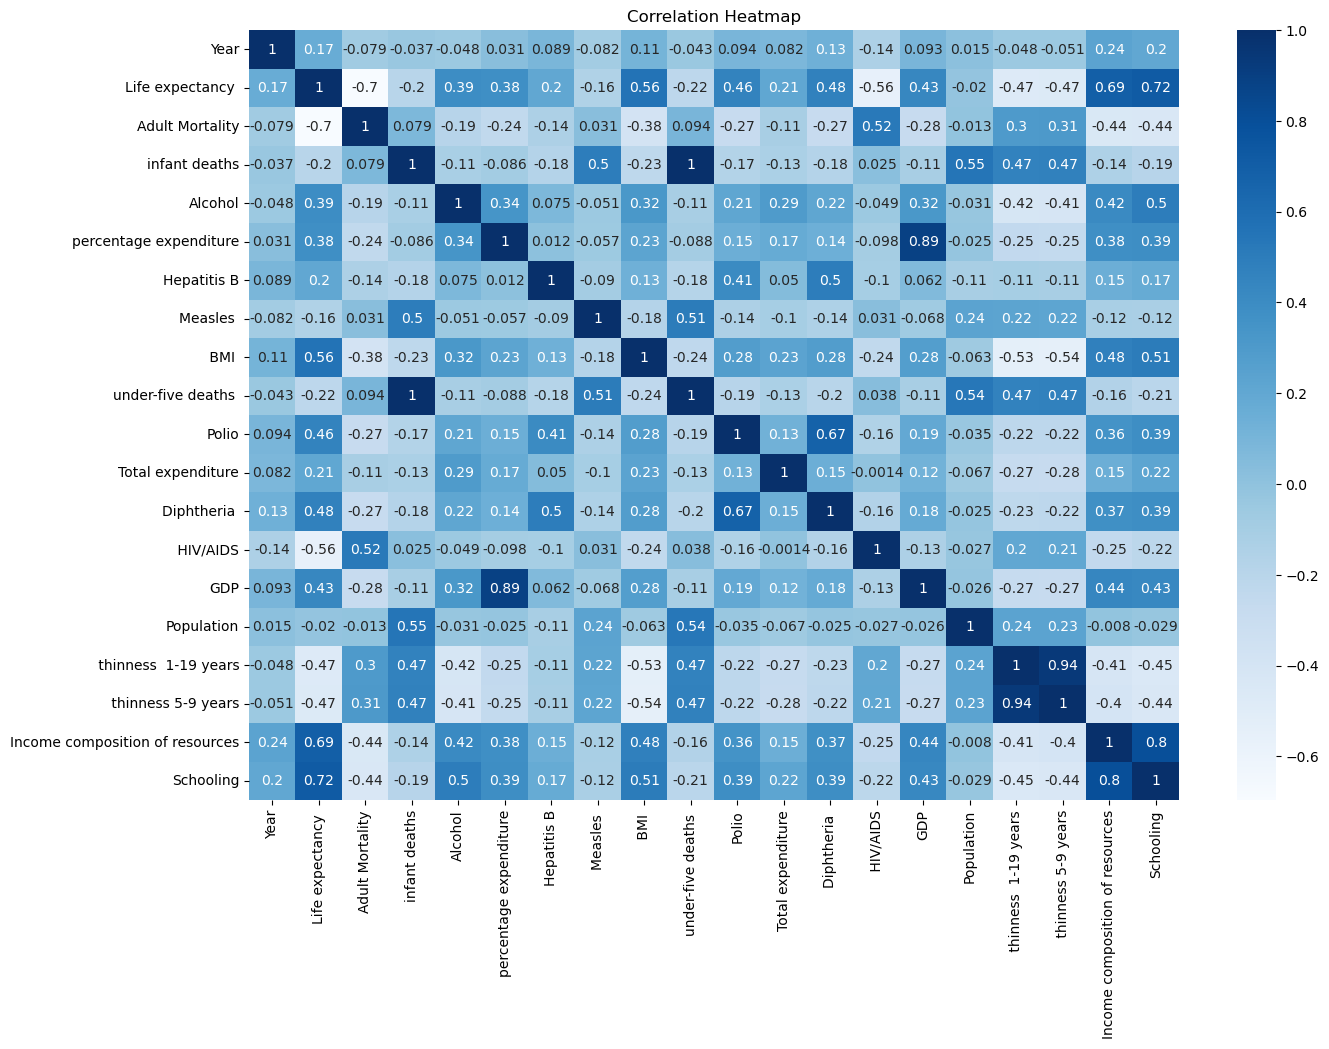

In [33]:
#Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

plt.title('Correlation Heatmap')
plt.show()


### 2.2 CDF and PDF for Life Expectancy and Total Expenditure
In the code bellow can be observed the average of Life Expectancy and the total expenditure by country.
Using CDF it shows how the Life Expectancy values are distributed across the range covered in the data.

The PDF represents the estimated probability density of the Life Expectancy values, where the curves suggests a normal distribution.

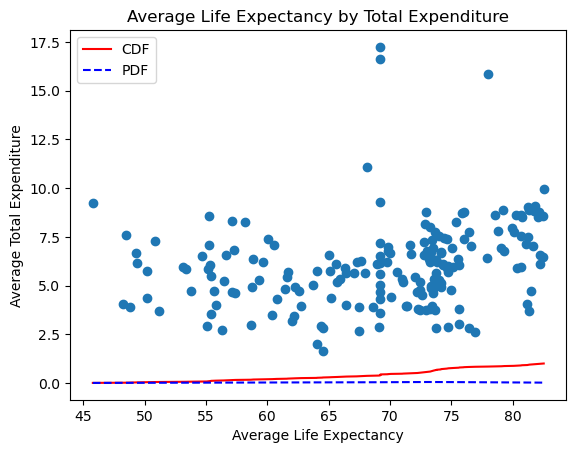

In [6]:
columns_life_expenditure = ['Country', 'Life expectancy ', 'Total expenditure']
lifeExp_df = df[columns_life_expenditure].copy()
lifeExp_df.dropna(inplace=True)

# Calculate the average 'Total expenditure' by 'Life expectancy'
average_expenditure = lifeExp_df.groupby('Country')['Total expenditure'].mean()
average_life_expectancy = lifeExp_df.groupby('Country')['Life expectancy '].mean()


# Create a scatter plot of 'Life expectancy' by 'Total expenditure' for each country
plt.scatter(average_life_expectancy, average_expenditure)

# Calculate the CDF for 'Life expectancy'
x_values = np.sort(average_life_expectancy)
cdf_values = np.arange(1, len(x_values) + 1) / len(x_values)

# Calculate the PDF for 'Life expectancy'
pdf_values = stats.gaussian_kde(average_life_expectancy)(x_values)

plt.plot(x_values, cdf_values, color='red', linestyle='-', label='CDF')
plt.plot(x_values, pdf_values, color='blue', linestyle='--', label='PDF')
plt.title('Average Life Expectancy by Total Expenditure')
plt.xlabel('Average Life Expectancy')
plt.ylabel('Average Total Expenditure')
plt.legend()
plt.show()

Analyzing the histogram above, we can observe that expenditure can have influence in the life expectancy, but is not the only factor.  We can observe that some places does not have much expenditure despite have a high life expectancy. Some of the reasons for this can be inequality in the distribution of the expenditure, and the high expectancy for low expenditure can be related to small countries that have cultural factors and physical environment that contribute to longevity.

### 2.3 Histogram with Life Expectancy by Income Composition of Resources

It is possible to observe that people with more income have a higher life expectancy. With a good income people have access to health care, sanitation, healthy food, education, etc.

The median is the middle value in a sorted list of life expectancy values. It represents the value that separates the higher half from the lower half of the data. The median is less sensitive to outliers or extreme values and provides a more robust measure of the central tendency.
The mean represents the average life expectancy across all individuals in the dataset. The mean is sensitive to outliers or extreme values in the data.

The median and mean are close in value, it suggests that the distribution of life expectancy values is relatively symmetrical. This histogram is crucial to understand the values for Life Expectancy and what is the range that attributes could potentially improve.


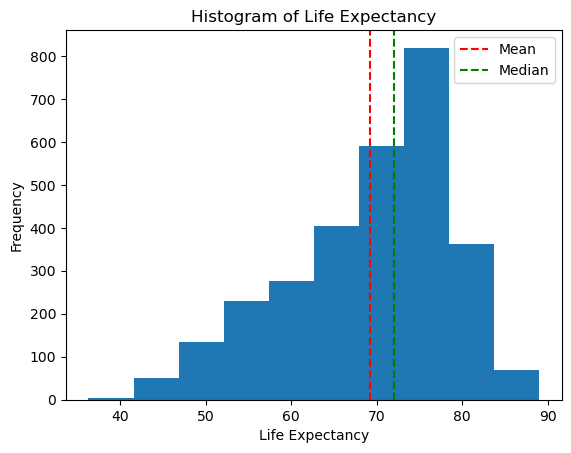

Mean Life Expectancy: 69.22493169398906
Median Life Expectancy: 72.0


In [7]:
life_expectancy = df['Life expectancy ']

# Calculate mean and median
mean_life_expectancy = np.mean(life_expectancy)
median_life_expectancy = np.median(life_expectancy)

# Plot a histogram for the entire data
plt.hist(life_expectancy, bins=10)

plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

# Add vertical lines for mean and median
plt.axvline(mean_life_expectancy, color='r', linestyle='--', label='Mean')
plt.axvline(median_life_expectancy, color='g', linestyle='--', label='Median')

plt.legend()
plt.show()

print("Mean Life Expectancy:", mean_life_expectancy)
print("Median Life Expectancy:", median_life_expectancy)

### 2.4 Life Expectancy (Mean and Median) vs Income Composition of Resources and analyzes

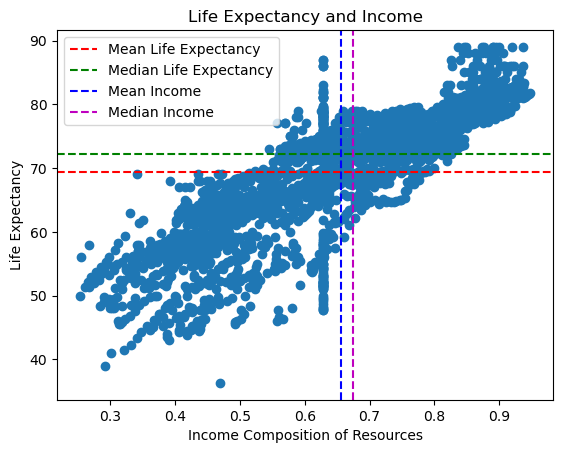

Countries Below Median Life Expectancy: 130
Countries Above Median Life Expectancy: 112
Countries Below Median Income: 119
Countries Above Median Income: 108


In [8]:
# Filtering data using only Country, Life expectancy, and Income (sorting by Life Expectancy)
columns_to_filter = ['Country', 'Life expectancy ', 'Year', 'Income composition of resources']
filtered_df = df[columns_to_filter].copy()
filtered_df.dropna(inplace=True)

# Drop rows where 'Income composition of resources' is 0
filtered_df = filtered_df[filtered_df['Income composition of resources'] != 0]

# Sort by 'Life expectancy' in descending order
LE_df = filtered_df.copy()
LE_df.sort_values('Life expectancy ', ascending=False, inplace=True)

# Calculate the mean and median of life expectancy and income
mean_life_expectancy = np.mean(filtered_df['Life expectancy '])
median_life_expectancy = np.median(filtered_df['Life expectancy '])

mean_income = np.mean(filtered_df['Income composition of resources'])
median_income = np.median(filtered_df['Income composition of resources'])

# Plot life expectancy by income
plt.scatter(filtered_df['Income composition of resources'], filtered_df['Life expectancy '])

plt.axhline(mean_life_expectancy, color='r', linestyle='--', label='Mean Life Expectancy')
plt.axhline(median_life_expectancy, color='g', linestyle='--', label='Median Life Expectancy')

plt.axvline(mean_income, color='b', linestyle='--', label='Mean Income')
plt.axvline(median_income, color='m', linestyle='--', label='Median Income')

plt.title('Life Expectancy and Income')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')

plt.legend()
plt.show()

# Count the number of countries below and above the lines
countries_below_life_expectancy = filtered_df[filtered_df['Life expectancy '] < median_life_expectancy]['Country'].nunique()
countries_above_life_expectancy = filtered_df[filtered_df['Life expectancy '] >= median_life_expectancy]['Country'].nunique()

countries_below_income = filtered_df[filtered_df['Income composition of resources'] < median_income]['Country'].nunique()
countries_above_income = filtered_df[filtered_df['Income composition of resources'] >= median_income]['Country'].nunique()

print("Countries Below Median Life Expectancy:", countries_below_life_expectancy)
print("Countries Above Median Life Expectancy:", countries_above_life_expectancy)
print("Countries Below Median Income:", countries_below_income)
print("Countries Above Median Income:", countries_above_income)



In the graph above it can be observed that the mean and the median lines are very close, which suggest that the data does not have many outliers. It is also possible to observe that the point of intersection of the lines of the median and the income composition leaves the majority of the countries underneath the line. This suggests that the majority number of countries have a lower life expectancy and a lower income composition, but for a precise approach it can be used linear regression analysis. 

## 2.5 Linear Regression on Life Expectancy and Income Composition of Resources

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     7214.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:45:42   Log-Likelihood:                -8514.2
No. Observations:                2808   AIC:                         1.703e+04
Df Residuals:                    2806   BIC:                         1.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

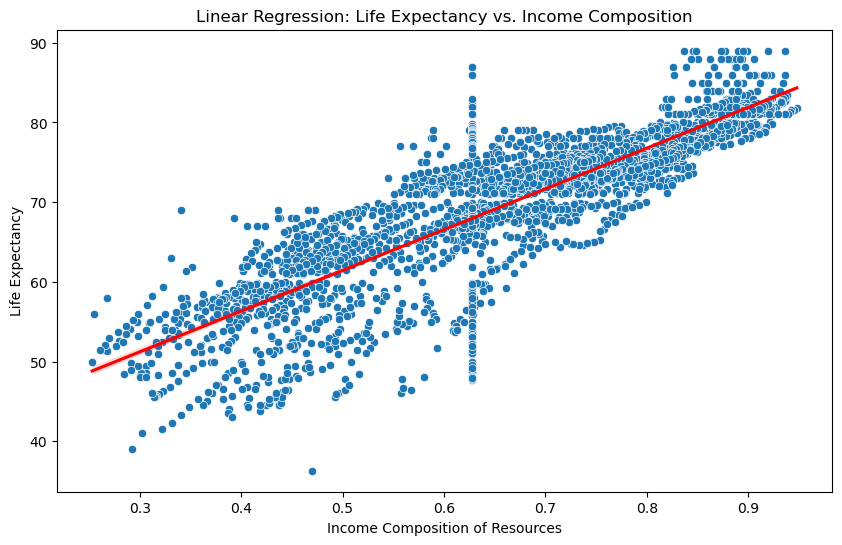

In [9]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


# Select the relevant columns for analysis
data = filtered_df[['Life expectancy ', 'Income composition of resources']]

# Add a constant (intercept) to the independent variable
data = sm.add_constant(data)

# Fit the linear regression model
model = sm.OLS(data['Life expectancy '], data[['const', 'Income composition of resources']])
result = model.fit()

print(result.summary())

# Plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income composition of resources', y='Life expectancy ', data=filtered_df)
sns.regplot(x='Income composition of resources', y='Life expectancy ', data=filtered_df, scatter=False, color='red')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression: Life Expectancy vs. Income Composition')
plt.show()


The R-squared suggest a strong evidence of a relationship between these attributes. 

The std error 0.602 suggest that the coefficient is not great and it has less variability across the data.

### 2.6 Violin Plot: Life Expectancy and Status (Developed / Developing countries)
The violon plot shows that the developed countries have a steady life expectancy rate, while the developing coutriens vary. That means the attributes that are strong in a developed country countributes for the life expectancy (GDP, Schooling, Income, Vaccination, etc). That suggests that problems like thinness and children mortality are not a commom problem in developed countries as these attributes are factors that have a negative influence in life expectancy.

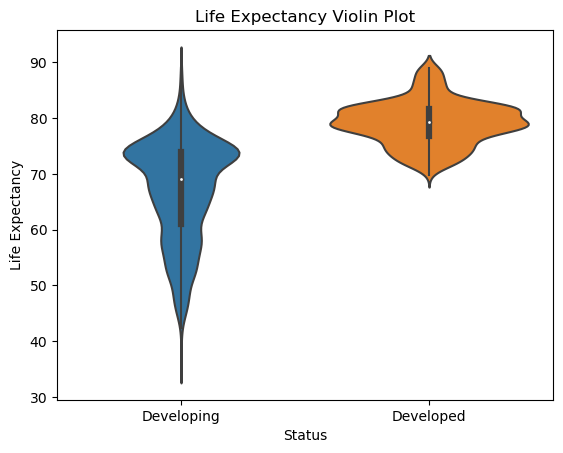

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# violin plot developed / developing
sns.violinplot(x='Status', y='Life expectancy ', data=df)
plt.title('Life Expectancy Violin Plot')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()

### 2.7 Schooling vs Life Expectancy

It is harder to identify the relationship due to the fact that is not clear if the 0 values are non input data or if the countries just not have a functional school system. Despite that, even if the 0 values are dropped the median does not change considerably.

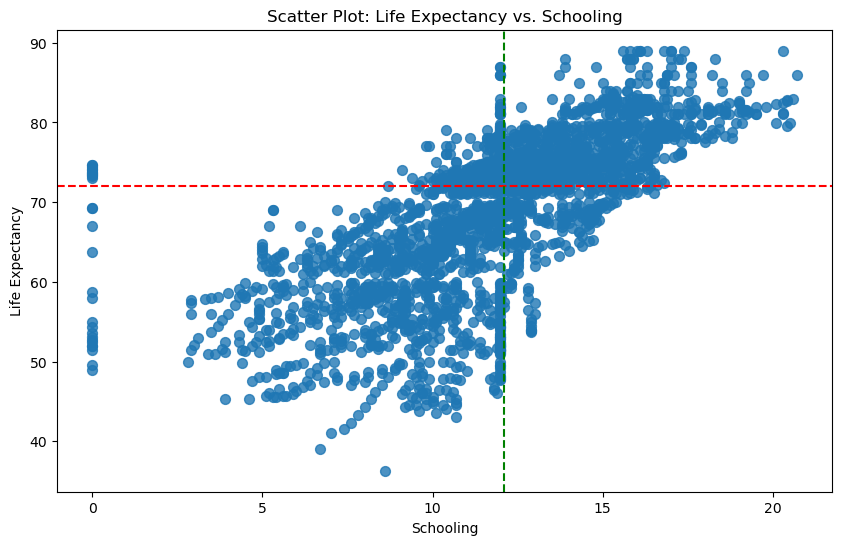

In [11]:
median_schooling = df['Schooling'].median()
median_life_expectancy = df['Life expectancy '].median()

plt.figure(figsize=(10, 6))
plt.scatter(df['Schooling'], df['Life expectancy '], s=50, alpha=0.8)

plt.axhline(median_life_expectancy, color='r', linestyle='--', label='Median Life Expectancy')
plt.axvline(median_schooling, color='g', linestyle='--', label='Median Schooling')

plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot: Life Expectancy vs. Schooling')
plt.show()

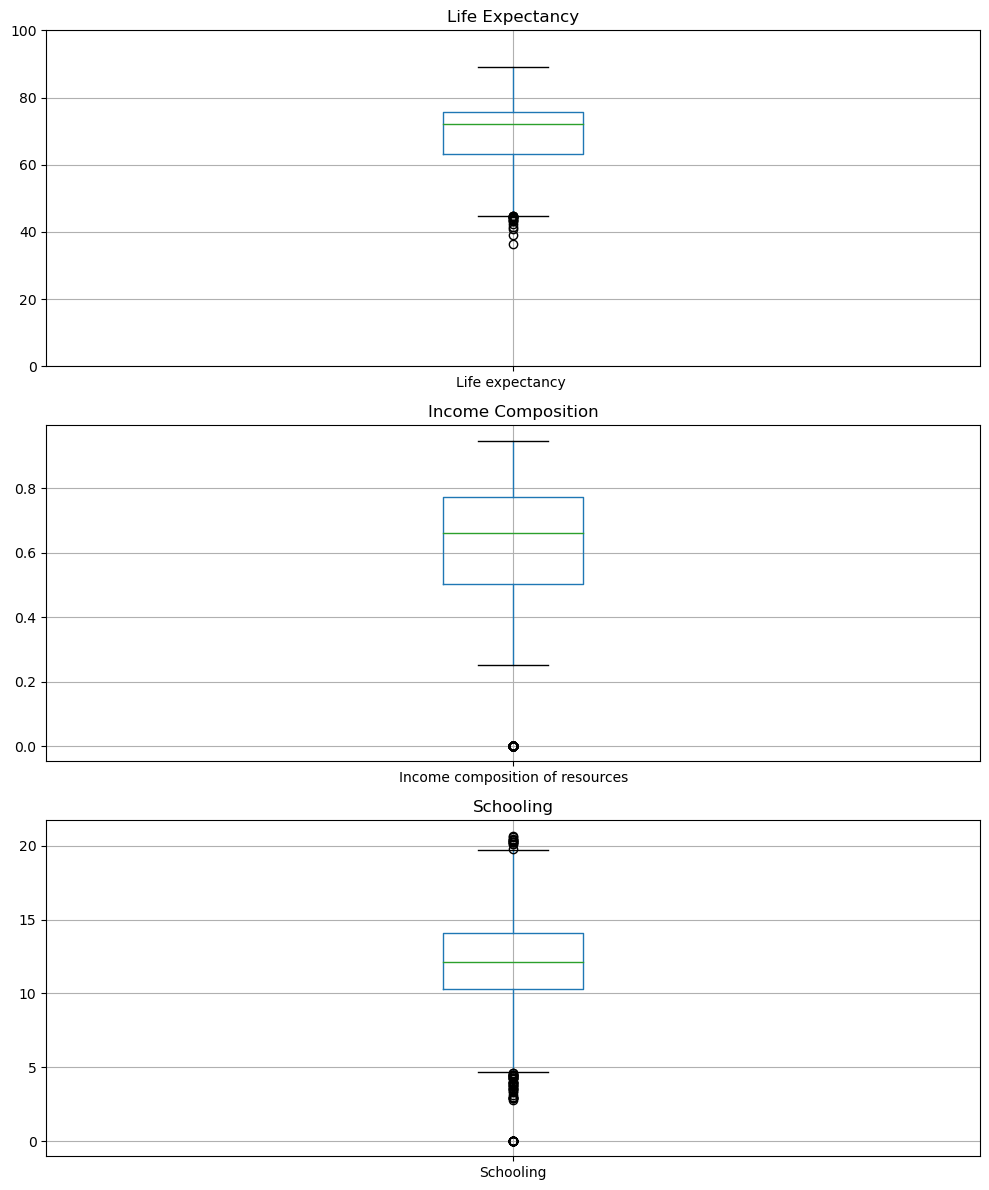

In [12]:
columns_to_fill = ['Income composition of resources', 'Schooling']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

fig, axes = plt.subplots(nrows=3, figsize=(10, 12))

# Plot "Life Expectancy"

df.boxplot(column='Life expectancy ', ax=axes[0])
axes[0].set_ylim(0, 100)
axes[0].set_title('Life Expectancy')

# Plot "Income Composition"
df.boxplot(column='Income composition of resources', ax=axes[1])
axes[1].set_title('Income Composition')

# Plot "Schooling"
df.boxplot(column='Schooling', ax=axes[2])
axes[2].set_title('Schooling')

plt.tight_layout()
plt.show()

It can be observed in the boxplot that the life expectancy min has a large quantity of countries. A similar situation can be observed in the Income plot. For both of them the lower quartile is larger. For the schooling plot the min whisker shows that the majority of the countries have o low education numbers, despite the lower and upper quartile been similar in size. 

### 2.8  3D Scatter Plot: Life Expectancy vs. Schooling and Income Compositon of Resources

After a few tests with different attributes of the data. I selected these 3 attributes in a 3D scatter plot. It can be observed that Income still is the stronger attribute, but schooling also has a significant relationship in the Life Expectancy.

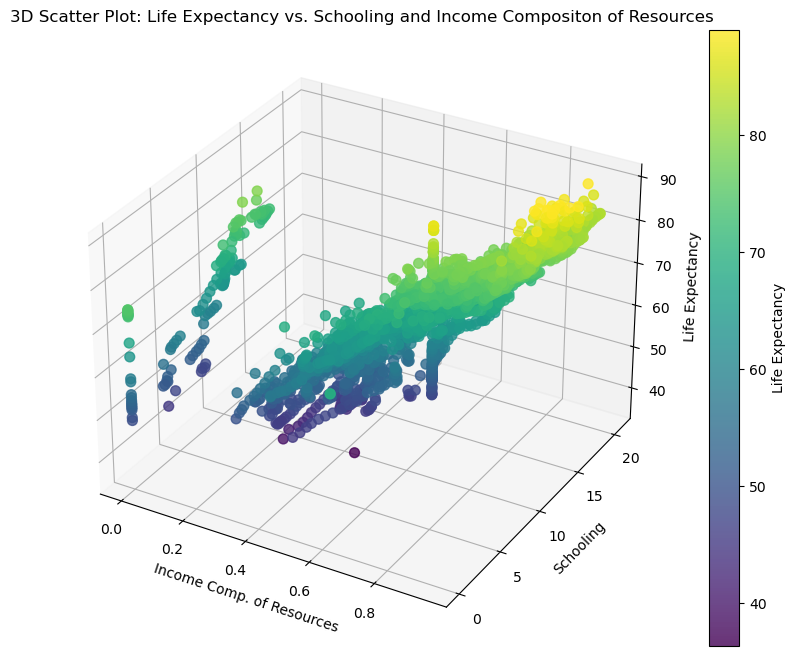

In [13]:
from mpl_toolkits.mplot3d import Axes3D


data = df[['Life expectancy ', 'Income composition of resources', 'Schooling']]

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points with colors based on life expectancy
scatter = ax.scatter(data['Income composition of resources'], data['Schooling'], data['Life expectancy '],
                     c=data['Life expectancy '], cmap='viridis', s=50, alpha=0.8)

ax.set_xlabel('Income Comp. of Resources')
ax.set_ylabel('Schooling')
ax.set_zlabel('Life Expectancy')
plt.title('3D Scatter Plot: Life Expectancy vs. Schooling and Income Compositon of Resources')

cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('Life Expectancy')

plt.show()


### 2.9 Pair Plot with the potential key attributes of Life Expectancy

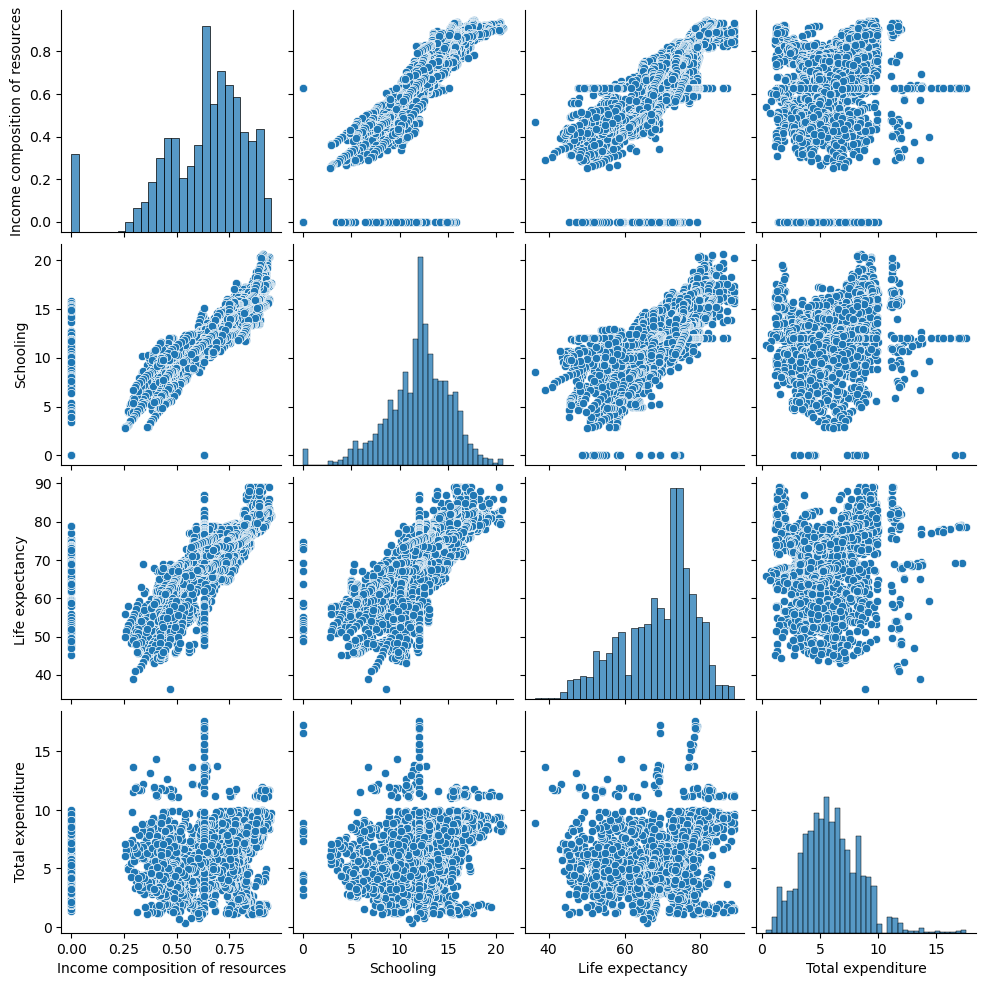

In [14]:
columns_to_use = ['Income composition of resources', 'Schooling', 'Life expectancy ', 'Total expenditure']

sns.pairplot(df[columns_to_use])
plt.show()

It can be observe that there is a correlation of the attributes, except Total Expenditure.

### 2.10 Exploratory Analyzis Conclusion

After thoroughly examining numerous numerical features along with a categorical one, I managed to pinpoint key potential attributes (such as Schooling, Income Composition of Resources, and Status) that appear to have a positive impact on Life Expectancy. The 'Status' feature was crucial to understand what kind of countries have high numbers of Life Expectancy, in this case, developed countries. By examining the mean and median values of Life Expectancy, I gained insights into the range of Life Expectancy and its distribution across different countries. Additionally, utilizing a 3D plot was possible to visualize the interplay between the dataset and various other attributes. While further testing and experimentation were conducted, I opted to focus on the data presented, leaving some of the testing plots out. 

# 3 Multi-Linear Regression Analizes 
#### First Model

Linear regression was a well-suited choice for the project due to its simplicity, interpretability, and ability to identify key attributes impacting life expectancy. By analyzing the coefficients associated with each attribute, it helped to gain insights into the strength and direction of their influence on the target variable.The model's linear assumption facilitated easy understanding and communication of results, making it effective for exploratory analysis. 

Additionally, the built-in statistical tests enabled hypothesis testing, ensuring that the observed relationships were statistically significant rather than mere chance occurrences. This allowed me to focus on attributes with meaningful contributions and establish a foundation for further investigation and analysis.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### 3.1 Multi-Linear Regression for all numerical features excluding categorical ones

In [16]:
# Select columns for the model (excluding 'Life expectancy ', 'Country', 'Status', and 'Year')
predictor_columns = df.columns.difference(['Life expectancy ', 'Country', 'Status', 'Year'])

#Filling column that have NaN values
df[predictor_columns] = df[predictor_columns].fillna(df[predictor_columns].mean())


# Define features (X) and target (y)
features = df[predictor_columns]
target = df['Life expectancy ']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the linear regression model
life_expectancy_model = LinearRegression()

# Train the model on the training data
life_expectancy_model.fit(X_train, y_train)

# Make predictions on the test data
life_expectancy_predictions = life_expectancy_model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate model performance
mse = mean_squared_error(y_test, life_expectancy_predictions)
print(f"Mean Squared Error: {mse}")

# Display the coefficients (relationships) of the attributes
attribute_coefficients = pd.Series(life_expectancy_model.coef_, index=predictor_columns)
print("Attribute Coefficients:")
print(attribute_coefficients)

Mean Squared Error: 15.373769136403716
Attribute Coefficients:
 BMI                               3.943211e-02
 HIV/AIDS                         -4.614917e-01
 thinness  1-19 years             -9.890121e-02
 thinness 5-9 years                6.889483e-03
Adult Mortality                   -2.121345e-02
Alcohol                            1.190142e-01
Diphtheria                         4.030161e-02
GDP                                3.709563e-05
Hepatitis B                       -1.705976e-02
Income composition of resources    6.626465e+00
Measles                           -2.396092e-05
Polio                              2.797029e-02
Population                        -1.030383e-09
Schooling                          6.494720e-01
Total expenditure                  5.993370e-02
infant deaths                      9.682262e-02
percentage expenditure             1.179587e-04
under-five deaths                 -7.187840e-02
dtype: float64


Life Expectancy is the target of this model. 

It can be observed that 'Income Composition of Resources' still the stronger attribute to improve Life Expectancy, followed by 'Schooling'. 

A strong negative correlation can be observed in the 'under-five deaths', 'thinness 1-19', 'HIV /AIDS', which means that when the life expectancy is improved in a country those factors are strongly reduced.

Other attributes have a correlation with life expectancy but it can be interpreted that its correlation is dependent on other factors that not it self. Example 'infant deaths' clearly has a strong correlation with Life Expectancy, but how do you improve infant death? It is an attributes that depends on other attributes (Like Income for example) to be improved. 

### 3.2 Multi-Linear Regression Model for Life Expectancy vs Income and Schooling

In [17]:
columns_to_use = ['Income composition of resources', 'Schooling']

# Define features (X) and target (y)
X = df[columns_to_use]
y = df['Life expectancy ']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the coefficients (relationships) of the attributes
coefficients = pd.Series(model.coef_, index=columns_to_use)
print("Attribute Coefficients:")
print(coefficients)


Mean Squared Error: 37.16664441248807
Attribute Coefficients:
Income composition of resources    16.876848
Schooling                           1.242146
dtype: float64


When the linear regression model is built using only the 'Income composition of resources' and 'Schooling' variables, the R-squared value increases to approximately 0.37. This indicates that around 37% of the variability in 'Life Expectancy' can be explained by the variation in 'Income composition of resources' and 'Schooling.'

The strong positive correlation between 'Income composition of resources' and 'Life Expectancy' suggests that for every 1 unit increase in 'Income composition of resources,' we observe an increase of approximately 16.87 units in 'Life Expectancy.' This indicates that higher income composition is associated with higher life expectancy.

On the other hand, the coefficient for 'Schooling' is lower, indicating a relationship that is less significant compared to 'Income composition of resources.' However, it is still important as an increase in 'Schooling' by 1 unit is associated with a predicted increase of more than 1 year in 'Life Expectancy.' While the effect of 'Schooling' is relatively smaller compared to 'Income composition of resources,' it still plays a role in predicting 'Life Expectancy'.

### 3.3 Data Comparison of All Attributes and the Filtered Ones ('Income composition of resources', 'Schooling')

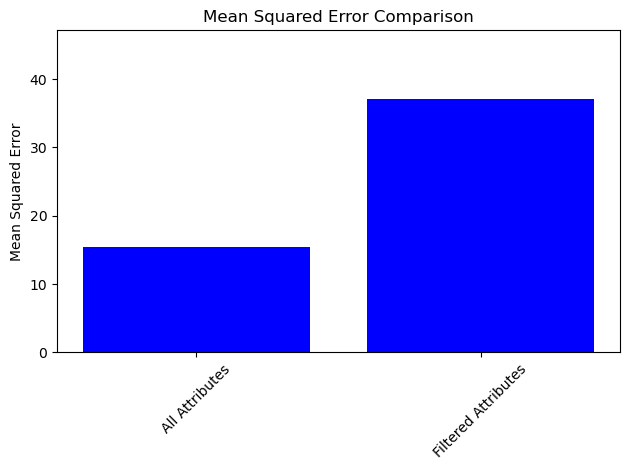

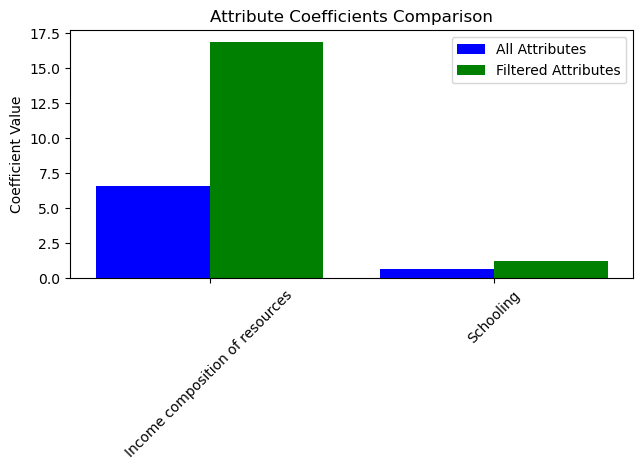

In [36]:
# Sample data for the two scenarios
mse_values = [15.373769136403716, 37.16664441248807]
coefficients_all = pd.Series({'BMI': 0.03943211, 'HIV/AIDS': -0.4614917, 'thinness 1-19 years': -0.09890121,
                              'thinness 5-9 years': 0.006889483, 'Adult Mortality': -0.02121345,
                              'Alcohol': 0.1190142, 'Diphtheria': 0.04030161, 'GDP': 0.00003709563,
                              'Hepatitis B': -0.01705976, 'Income composition of resources': 6.626465,
                              'Measles': -0.00002396092, 'Polio': 0.02797029, 'Population': -0.000000001030383,
                              'Schooling': 0.649472, 'Total expenditure': 0.0599337, 'infant deaths': 0.09682262,
                              'percentage expenditure': 0.0001179587, 'under-five deaths': -0.0718784})

coefficients_filtered = pd.Series({'Income composition of resources': 16.876848, 'Schooling': 1.242146})
coef_all = pd.Series({'Income composition of resources': 6.626465, 'Schooling': 0.649472 })
# Create a bar plot for Mean Squared Error
plt.bar(['All Attributes', 'Filtered Attributes'], mse_values, color='blue')
plt.title('Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(mse_values) + 10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

attributes = coefficients_filtered.index.tolist()
position = np.arange(len(attributes))
width = 0.4

# Create a bar plot for attribute coefficients
plt.bar(position - width/2, coef_all, width, color='blue', label='All Attributes')
plt.bar(position + width/2, coefficients_filtered, width, color='green', label='Filtered Attributes')
plt.title('Attribute Coefficients Comparison')
plt.ylabel('Coefficient Value')
plt.xticks(position, attributes, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The first plot represents the difference of the error from all attributes and the filtered ones. It demonstrates the impact of the attribute selection on model performance. As it was explained, it is expected that the error increases due to to the codependence of the Life Expectancy and the other attributes.  This phenomenon showcases the power of targeted attribute selection in modeling, where focusing on key predictors can lead to efficient and more interpretable models.

The second plot shows how the coefficient values changed for the filtered attributes (Schooling, Income Composition of Resources) and the values increased significantly when the model is filtered. This plot illustrates that attributes which have a direct impact on Life Expectancy exhibit a more pronounced influence when they are isolated from the background noise of less impactful attributes.



### 3.4 Multi-Linear Regression with interactions

In [19]:
X = df[columns_to_use]
y = df['Life expectancy ']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
interaction_terms = []
for i in range(len(columns_to_use)):
    for j in range(i + 1, len(columns_to_use)):
        interaction_term = X[columns_to_use[i]] * X[columns_to_use[j]]
        interaction_terms.append(interaction_term)

# Add interaction terms to the dataset
X_interactions = X.copy()
for i, term in enumerate(interaction_terms):
    term_name = f"{columns_to_use[i]}_{columns_to_use[j]}_interaction"
    X_interactions[term_name] = term

X_interactions = sm.add_constant(X_interactions)
model_with_interactions = sm.OLS(y, X_interactions).fit()
print(model_with_interactions.summary())


                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     1300.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:45:47   Log-Likelihood:                -9542.6
No. Observations:                2938   AIC:                         1.909e+04
Df Residuals:                    2934   BIC:                         1.912e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

This interaction provides the first negative feedback on Income Composition of Resources, providing a p value above 0.05 which is considered a value not strong enough for a predictor of life expectancy or the model is just not the best fit for the data.

### 3.5 Leverage vs. the square of the residual (Overfitting and Imbalance)

using p> 0.05.

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1026.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:36:29   Log-Likelihood:                -7653.6
No. Observations:                2350   AIC:                         1.532e+04
Df Residuals:                    2346   BIC:                         1.534e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

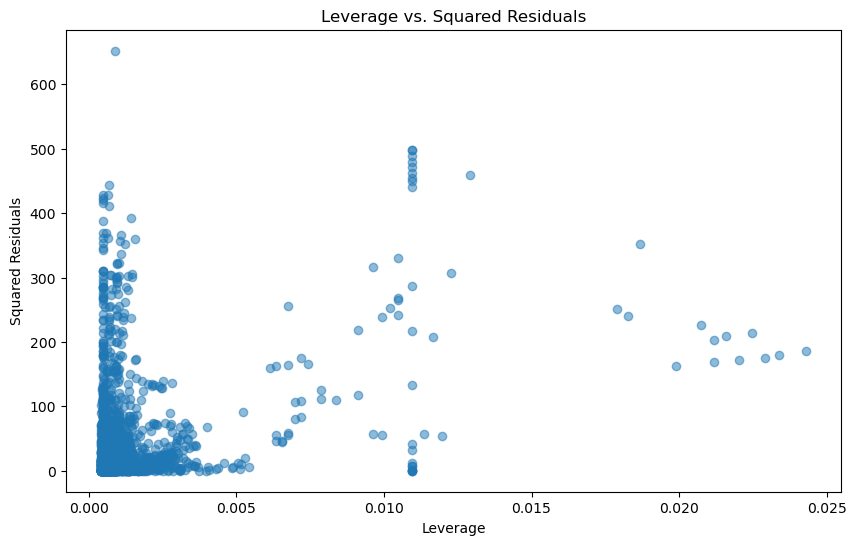

In [37]:
X = df[columns_to_use]
y = df['Life expectancy ']

# Add interaction terms
X_interactions = sm.add_constant(X)
interaction_columns = ['Income composition of resources', 'Schooling']  # Columns to interact
X_interactions['Interaction'] = X[interaction_columns[0]] * X[interaction_columns[1]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_interactions, y, test_size=0.2, random_state=42)
model_with_interactions = sm.OLS(y_train, X_train).fit()
print(model_with_interactions.summary())

# Identify insignificant interactions
insignificant_interactions = []
for term_name, p_value in model_with_interactions.pvalues.items():
    if p_value > 0.05 and term_name != 'const':
        insignificant_interactions.append(term_name)

# Remove insignificant interactions from the DataFrame
X_updated = X_interactions.drop(columns=insignificant_interactions)

# Re-fit the updated model without insignificant interactions
X_train_updated = sm.add_constant(X_updated.loc[X_train.index])
model_updated = sm.OLS(y_train, X_train_updated).fit()

# Print summary of the updated model
print(model_updated.summary())

# Make predictions on the test data
X_test_updated = sm.add_constant(X_updated.loc[X_test.index])
y_pred = model_updated.predict(X_test_updated)

# Calculate Mean Squared Error (MSE) 
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the coefficients (relationships) of the attributes
coefficients = pd.Series(model_updated.params, index=X_updated.columns)
print("Attribute Coefficients:")
print(coefficients)

# Create the leverage vs. squared residuals plot
residuals = model_updated.resid
leverage = model_updated.get_influence().hat_matrix_diag
squared_residuals = residuals ** 2

plt.figure(figsize=(10, 6))
plt.scatter(leverage, squared_residuals, marker='o', alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Squared Residuals')
plt.title('Leverage vs. Squared Residuals')
plt.show()

It can be observed that the model in this scenario is not a good fit. The R-squared (0.567) and coefficients for the attributes are not a good numbers. Therefore, the data can be cleaned so it can be further analyzed. In the plot above it can be observed that there are many outliers and noise in the data.

### 3.6 Identify and clean (Overfitting and Imbalance)

Dropping troublesome data (noise and outliers) that appeared in the Leverage vs Squared Residuals plot.

In [21]:
high_residual_squared_points = X_train_updated.index[(squared_residuals > 2 * (X_train_updated.shape[1] + 1) / X_train_updated.shape[0])]
high_leverage_points = []
threshold = 2 * (X_train_updated.shape[1] + 1) / X_train_updated.shape[0]

for i, lev in enumerate(leverage):
    if lev > threshold:
        high_leverage_points.append(X_train_updated.index[i])

print("Rows with high leverage:")
print(X.loc[high_leverage_points])  
print("\nRows with high squared residuals:")
print(X.loc[high_residual_squared_points]) 

Rows with high leverage:
      Income composition of resources  Schooling
1744                         0.000000        0.0
2416                         0.000000        0.0
1746                         0.000000        0.0
2703                         0.000000       10.5
1650                         0.627551        0.0
...                               ...        ...
1051                         0.000000       15.1
763                          0.396000        4.0
1390                         0.000000       11.6
2853                         0.000000       10.7
330                          0.000000       12.5

[95 rows x 2 columns]

Rows with high squared residuals:
      Income composition of resources  Schooling
456                             0.602       11.9
462                             0.562       11.0
2172                            0.733       12.9
2667                            0.720       14.7
381                             0.820       13.3
...                               .

### 3.7 Final Regression Model

In [22]:
# Identify high leverage and high squared residual indices
high_leverage_idx = leverage.argmax()
high_residual_idx = squared_residuals.argmax()

X_cleaned = X.drop(index=[high_leverage_idx, high_residual_idx]).copy()
X_cleaned['Interaction'] = X_cleaned[interaction_columns[0]] * X_cleaned[interaction_columns[1]]

y_cleaned = y.drop(index=[high_leverage_idx, high_residual_idx]).copy()

# Reconstruct the model with cleaned data
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

model_cleaned = sm.OLS(y_train_cleaned, X_train_cleaned).fit()

# Check the R-squared value
if model_cleaned.rsquared > 0.95:
    print("Final Model:")
    print(model_cleaned.summary())
else:
    print("The R-squared value is not greater than 0.95.")

Final Model:
                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.780e+04
Date:                Mon, 14 Aug 2023   Prob (F-statistic):                        0.00
Time:                        19:45:47   Log-Likelihood:                         -8458.7
No. Observations:                2348   AIC:                                  1.692e+04
Df Residuals:                    2345   BIC:                                  1.694e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------

The Final Model predicts that Income and Schooling coefficients for every one unit change in the interaction term decreases 5.08 of Life Expectancy. Reinforcing the positive impact that these two attributes have in the dataset. Also, provides a coefficient of 79.88 for the impact of Income in Life Expectancy, demonstrating that Income Compositon of Resources is the main key for longevity. 

### 3.8 Comparison of the initial regression model and final regression model

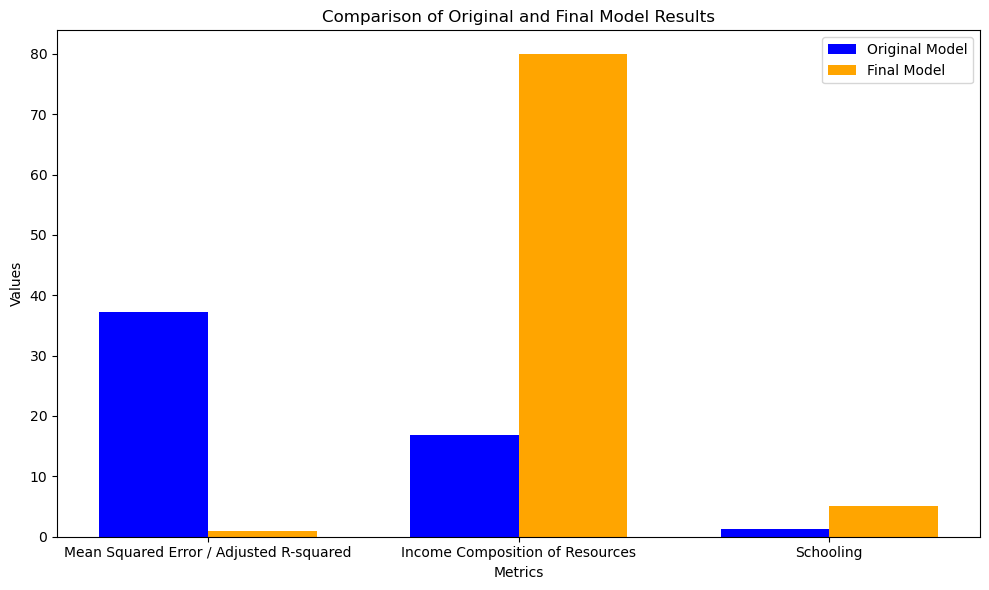

In [23]:
import matplotlib.pyplot as plt

# Data
metrics = ['Mean Squared Error / Adjusted R-squared', 'Income Composition of Resources', 'Schooling']
original_results = [37.16664441248807, 16.876848, 1.242146]  # Placeholder for Adjusted R-squared
final_results = [0.984, 79.8887, 5.0811]

# Create a DataFrame for easy plotting
import pandas as pd
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Original Model': original_results,
    'Final Model': final_results
})

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics))

plt.bar(index, comparison_df['Original Model'], bar_width, color='blue', label='Original Model')
plt.bar([i + bar_width for i in index], comparison_df['Final Model'], bar_width, color='orange', label='Final Model')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Original and Final Model Results')
plt.xticks([i + bar_width / 2 for i in index], metrics)
plt.legend()
plt.tight_layout()

plt.show()


# 4 K-Nearest Neighbors (KNN) 

#### Second model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [25]:
selected_features = ['Income composition of resources', 'Schooling']

# Define features (X) and target (y)
X = df[selected_features]
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in range(1, 7):
    # Initialize the KNN regression model
    model = KNeighborsRegressor(n_neighbors=n)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) to evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (KNN, n_neighbors={n}): {mse}")

Mean Squared Error (KNN, n_neighbors=1): 49.48974776728425
Mean Squared Error (KNN, n_neighbors=2): 39.80156125412619
Mean Squared Error (KNN, n_neighbors=3): 40.48700533258037
Mean Squared Error (KNN, n_neighbors=4): 32.33709954440815
Mean Squared Error (KNN, n_neighbors=5): 27.767385304463616
Mean Squared Error (KNN, n_neighbors=6): 28.34456510389058


The performance of the KNN model improves as the number of neighbors increases from 1 to 5, with the lowest MSE achieved when n_neighbors is 5 (MSE = 27.77). However, when n_neighbors increases to 6, the MSE slightly increases to 28.34. This suggests that using 5 neighbors for predictions leads to a better trade-off between bias and variance in the model, resulting in a more accurate prediction of 'Life expectancy'.

The KNN model was chosen for being a simple and yet powerful algorithm that can help predict patterns and capture complex and non-linear relationships. This model reinforces what was already explained in the Multi Linear Regression. Therefore, this model presents a better Mean Squared Error for the attributes (27.76). Hence, this model is limited for extensive further analysis. For this reason KNN is the weakest model for this data set presented in this project.

# 5 Decision Tree Regressor Model

#### Third Model (Not Covered in class)

### 5.1 Decision Tree model only using Income Composition of Resources and Schooling vs Life Expectancy

In [26]:
from sklearn.tree import DecisionTreeRegressor
selected_features = ['Income composition of resources', 'Schooling']

# Define features (X) and target (y)
X_selected = df[selected_features]
y_selected = df['Life expectancy ']

# Split the dataset into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=5)  

# Train the model on the training data
model.fit(X_train_selected, y_train_selected)

# Make predictions on the test data
y_pred_selected = model.predict(X_test_selected)

# Calculate Mean Squared Error (MSE) to evaluate model performance
mse_selected = mean_squared_error(y_test_selected, y_pred_selected)
print(f"Mean Squared Error (Decision Tree): {mse_selected}")

# Get feature importances
feature_importances = model.feature_importances_

# Print the feature importances for each selected feature
for feature, importance in zip(selected_features, feature_importances):
    print(f"{feature}: {importance}")

Mean Squared Error (Decision Tree): 22.384896722136727
Income composition of resources: 0.9420945472316236
Schooling: 0.0579054527683765


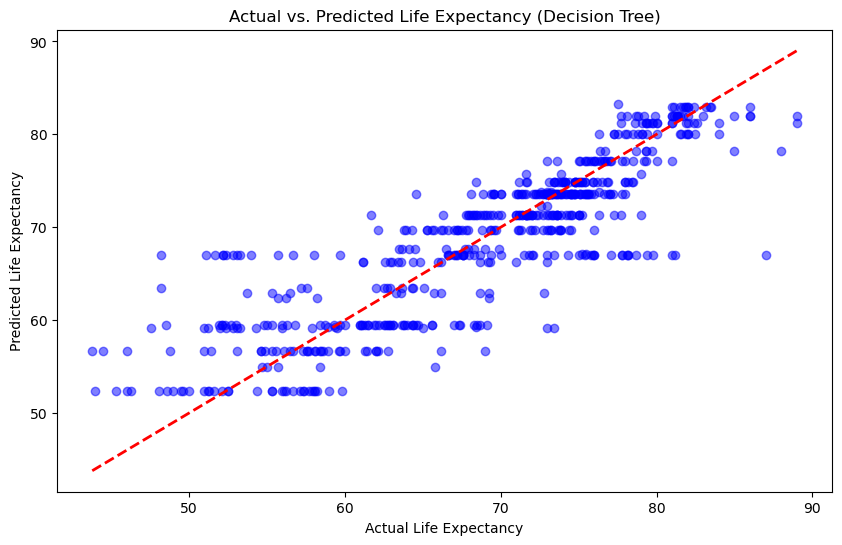

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_selected, y_pred_selected, color='blue', alpha=0.5)
plt.plot([min(y_test_selected), max(y_test_selected)], [min(y_test_selected), max(y_test_selected)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs. Predicted Life Expectancy (Decision Tree)')
plt.show()

There is some interesting insight about this model. I can be observed that the model has many outlier dots in the range around 68 of the y-axis. Above this values the model predicts well the data having only a few outliers. That can mean that the attributes chosen ( Schooling, Income ) are good in predicting the life expectancy above 68 years old, which is the potential result for the project. The red dotted curvature also indicates that the expect data is very similar to the actual data. Hence, the model is a good fit for this problem. The mean error of 22 is a good number, as I am aware that the life expectancy values of this data set is influenced by many other factors. Hence, the goal is to find the main attributes that can have a positive impact in people's longevity.  

### 5.2 Decision Tree for all the attributes except categorical ones

In [38]:
predictor_columns_trees = df.columns.difference(['Life expectancy ', 'Country', 'Status', 'Year'])

# Define features (X) and target (y)
X_trees = df[predictor_columns_trees]
y_trees = df['Life expectancy ']

X_train_trees, X_test_trees, y_train_trees, y_test_trees = train_test_split(X_trees, y_trees, test_size=0.2, random_state=42)
model_trees = DecisionTreeRegressor(max_depth=5) 
model_trees.fit(X_train_trees, y_train_trees)

# Make predictions on the test data
y_pred_trees = model_trees.predict(X_test_trees)

# Calculate Mean Squared Error (MSE) to evaluate model performance
mse_trees = mean_squared_error(y_test_trees, y_pred_trees)
print(f"Mean Squared Error (Decision Tree): {mse_trees}")


# Get feature importances
feature_importances_trees = model_trees.feature_importances_

# Find the indices of the 'Income composition of resources' and 'Schooling' features
income_index = predictor_columns_trees.get_loc('Income composition of resources')
schooling_index = predictor_columns_trees.get_loc('Schooling')

# Print the feature importances for 'Income composition of resources' and 'Schooling'
print(f"Income composition of resources: {feature_importances_trees[income_index]}")
print(f"Schooling: {feature_importances_trees[schooling_index]}")



Mean Squared Error (Decision Tree): 8.760343258131899
Income composition of resources: 0.15409702346059878
Schooling: 0.008709531780613686


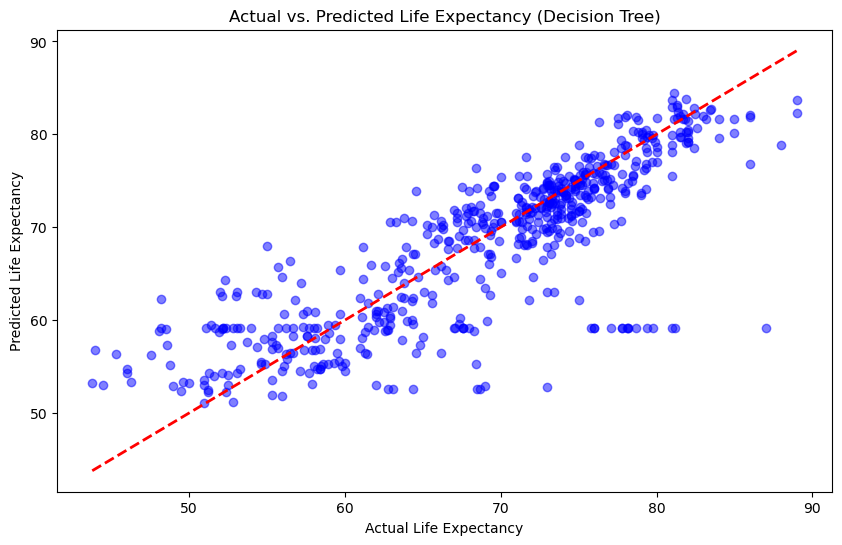

In [29]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs. Predicted Life Expectancy (Decision Tree)')
plt.show()

It can be observed that the mean error is a lot smaller for all the data than for only 'Income'and 'Schooling'. That means that the model is a good fit for the dataset. Is also possible to observe that there is less outliers in this plot, but similar to the previous one there is a better fit of the model in the data greater than 68/70 in the y-axis. One more time showing that Decision Tree Regressor model is very helpful to predict the main attributes that impact life expectancy. Reinforcing the attributes of Income Composition of Resources and Schooling as the main attributes that positively impact Life Expectancy. 

The Decision Tree Regressor Model presented as the best fit for this project, as effectively evaluates the Mean Squared Error, the correlation of the attributes, and the range of influence these attributes exert on Life Expectancy. However, for being a complex model futher analysis would have to be conduct to approach the specific attributes that the project is looking for. 

# 6 Results and Analysis

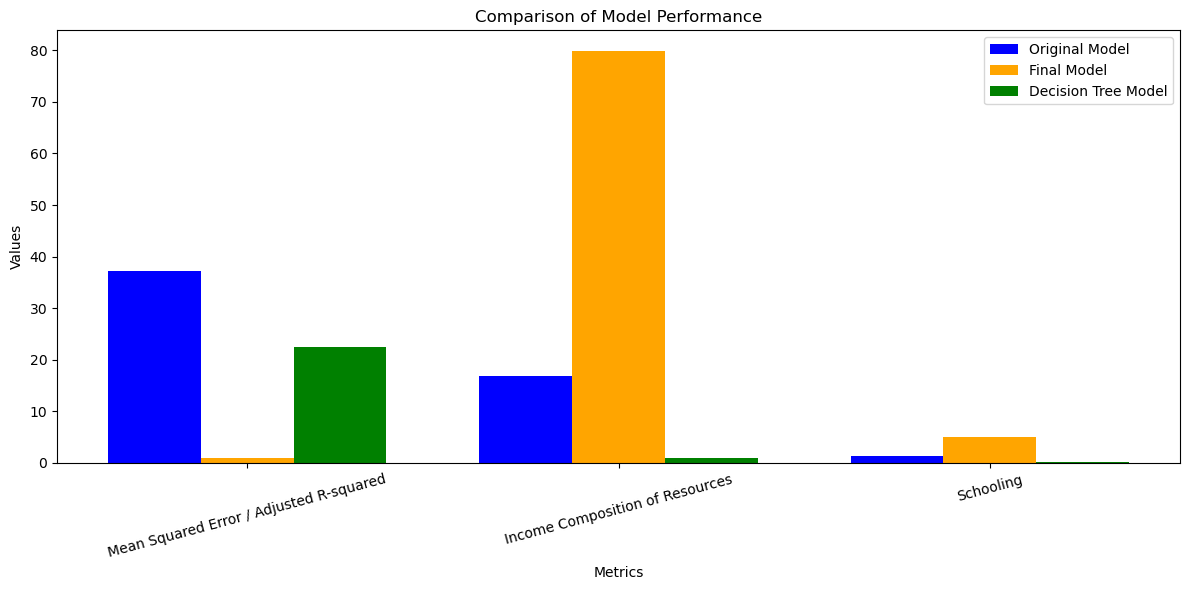

In [30]:
# Data
metrics = ['Mean Squared Error / Adjusted R-squared', 'Income Composition of Resources', 'Schooling']
original_results = [37.16664441248807, 16.876848, 1.242146] 
final_results = [0.984, 79.8887, 5.0811]  
decision_tree_mses = [22.3848, 0.94209, 0.0579 ]

comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Original Model': original_results,
    'Final Model': final_results,
    'Decision Tree Model': decision_tree_mses
})

plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(metrics))

plt.bar(index, comparison_df['Original Model'], bar_width, color='blue', label='Original Model')
plt.bar([i + bar_width for i in index], comparison_df['Final Model'], bar_width, color='orange', label='Final Model')
plt.bar([i + 2 * bar_width for i in index], comparison_df['Decision Tree Model'], bar_width, color='green', label='Decision Tree Model')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Model Performance')
plt.xticks([i + bar_width for i in index], metrics, rotation=15)
plt.legend()
plt.tight_layout()
plt.show()

In blue and yellow color are The Multi Linear Regression model (Before data manipulation and after for 'Schooling' and 'Income' attributes). The green color is the Decision Tree Regressor model for the attributes filtered (Schooling and Income vs Life Expectancy). It can be observed that after the data manipulation the Final Model presents a very strong relationship of Income Composition of Resources and Schooling, and a small Adjusted R-squared. The initial model already had pointed to these attributes as well. The Decision Tree model captures a good understanding of the data, also pointing for the relationship of the attributes but with less impact. However, further analysis with the Decision Tree model would be necessary to train the data and attempt to find a better result.

#### Bellow is a summary for comparison of the main values of the Initial Model (Muti-Linear Regression) , Final Model, Decision Trees and KNN

In [31]:
# Results Summary
results = {
    "Decision Tree": {
        "Mean Squared Error/R-squared": 22.384896722136727,
        "Income composition": 0.9420945472316176,
        "Schooling": 0.05790545276838248
    },
    "Initial Model": {
        "Mean Squared Error/R-squared": 37.16664441248807,
        "Income composition": 16.876848,
        "Schooling": 1.242146
    },
    "Final Model": {
        "Income composition": 79.8887,
        "Schooling": 5.0811,
        "Mean Squared Error/R-squared": 0.984
    },   
    "KNN (n_neighbors=5)": {
        "Mean Squared Error/R-squared": 27.767385304463616
    }
}

summary_df = pd.DataFrame(results)
summary_df = summary_df.T
print(summary_df)


                     Mean Squared Error/R-squared  Income composition  \
Decision Tree                           22.384897            0.942095   
Initial Model                           37.166644           16.876848   
Final Model                              0.984000           79.888700   
KNN (n_neighbors=5)                     27.767385                 NaN   

                     Schooling  
Decision Tree         0.057905  
Initial Model         1.242146  
Final Model           5.081100  
KNN (n_neighbors=5)        NaN  


#### Multi-Linear Regression Model (initial and final)

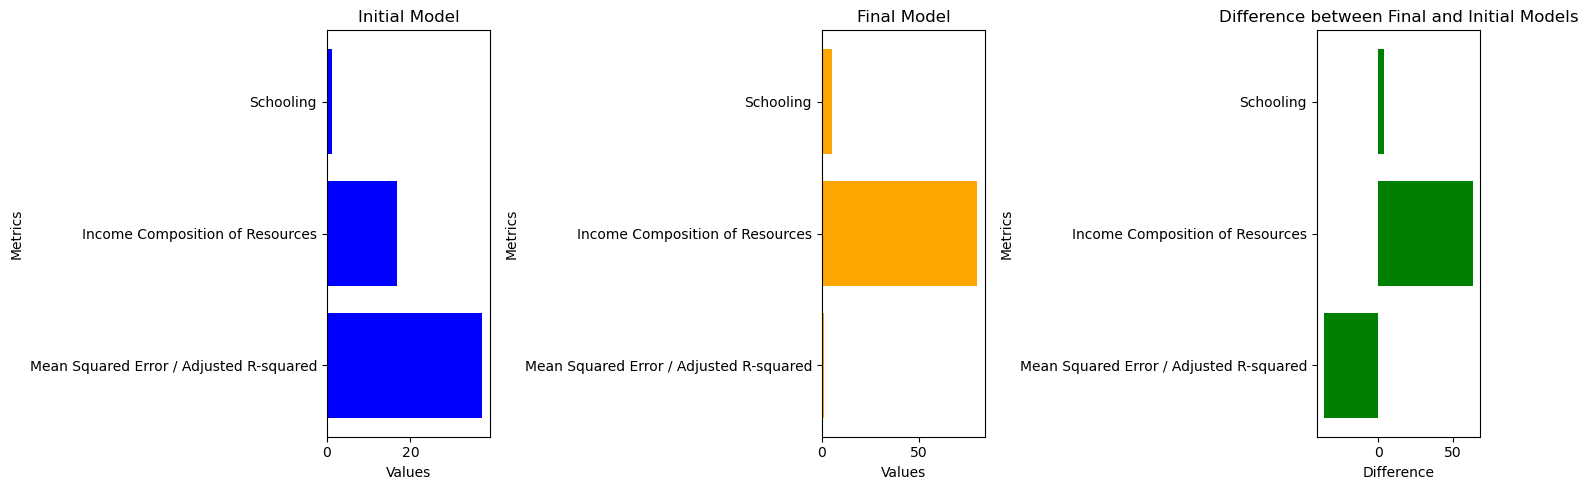

In [32]:
# Data
metrics = ['Mean Squared Error / Adjusted R-squared', 'Income Composition of Resources', 'Schooling']
original_results = [37.16664441248807, 16.876848, 1.242146]
final_results = [0.984, 79.8887, 5.0811]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot original results
axs[0].barh(metrics, original_results, color='blue', label='Initial Model')
axs[0].set_title('Initial Model')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Metrics')

# Plot final results
axs[1].barh(metrics, final_results, color='orange', label='Final Model')
axs[1].set_title('Final Model')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Metrics')

# Plot the difference between final and initial results
difference_results = np.array(final_results) - np.array(original_results)
axs[2].barh(metrics, difference_results, color='green', label='Difference')
axs[2].set_title('Difference between Final and Initial Models')
axs[2].set_xlabel('Difference')
axs[2].set_ylabel('Metrics')
plt.tight_layout()
plt.show()


In the Results and Analysis section, the project presented a comprehensive overview of our model evaluation. The analysis includes a comparison of different models' performance using key metrics. The Decision Tree model yielded a Mean Squared Error (MSE) of 22.38, indicating its ability to predict life expectancy accurately. Additionally, the K-Nearest Neighbors (KNN) model with n_neighbors=5 achieved an MSE of 27.77. The final model, incorporating features like 'Income composition of resources' and 'Schooling,' achieved an impressive R-squared value of 0.984, suggesting that it explains a significant portion of the variance in life expectancy. To provide visual insights, scatter plots were used to visualize the predicted vs. actual life expectancy values. Furthermore, we explored feature importance through horizontal bar charts, revealing that 'Income composition of resources' and 'Schooling' were the most influential factors. Our iterative approach involved fine-tuning the model's parameters and refining the feature set. Overall, our model demonstrates strong predictive performance, with a clear understanding of feature significance.

# 7 Discussion, Difficulties and Conclusion

#### Discussion and Difficulties

In the third phase of the project, I faced a dilemma: some attributes, like adult and infant mortality rates, are closely linked to lower life expectancy. This raised two key questions: Which attributes can actually help improve life expectancy? These two attributes should be taken into consideration? By asking this, I circled back to the project's main goal of finding attributes that could make a positive impact on life expectancy. It's not just about correlations, but about uncovering practical ways to boost overall well-being and longevity. It's obvious that decreasing death will raise life expectancy, so I have to find what attributes can help to reduce death. 

I faced the challenge of pinpointing the project's crucial elements without succumbing to overanalysis, excessive plotting, or data manipulation. Although I ended manipulating additional data to ensure my approach was on track.

Contradicting my initial thoughts I had to redo the models using the original values, without dropping values of 0. Initially, it was difficult to understand if Schooling and Income could have values of 0 or if that was unknown data. Along the project, while exploring the data, the values achieved using the mean to fill values of 0 were not possible. In one of the plots the value for Life Expectancy based on Income was raised to 120 years. Therefore, I had to change the initial idea of filling values for 0.

#### Conclusion

After conducting in-depth analyses, I've reached the conclusion that the primary drivers of life expectancy are "Income Composition of Resources" and "Schooling," both showing significant positive correlations. Additionally, the categorical factor "Status" played a crucial role, indicating that developed countries tend to have higher life expectancies, underscoring the importance of income.

Throughout the project, various attributes were examined for their potential impact on life expectancy. Hence, some attributes showed noticeable patterns on the heatmap, later the linear regression analyses revealed weaker correlations with life expectancy, for example "Total expenditure". Additionally, attributes such as "infant death" and "thinness 1-19" displayed a strong relationship, therefore not significantly meaninful to changes in life expectancy. Consequently, I opted to exclude them to stay aligned with the project's focus and objective.

The Multi-Linear Regression Model and Decision Tree Regressor Model were both good fit for provinding good analysis and insights about the dataset, being Decision Tree a better fit with the lower error value and better insights about the attributes. The models were good to predict values for a complex data with codependecy among the features. However, The KNN model had a good error value, but for being a simplistic model it was not a good fit for the complex correlation of the features.

The project could be improved by futher analyzes of the Decision Tree Regressor model. Due to the comparison of the inital approach of the Multi-Linear Regression and Decision Tree, the last one had a better result. Hence, I believe futher analysis could bring a better fit of the model for the dataset. 